<a href="https://colab.research.google.com/github/hmalta/QuarentenaDados/blob/master/QuarentenaDados_aula03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Olá, seja bem-vinda e bem-vindo ao notebook da **aula 03**! A partir desta aula iremos analisar e discutir uma base de dados junto com você. Por isso, será **importante que as discussões nos vídeos sejam acompanhadas** para entender todos os processos das análises.



Nessa aula utilizaremos uma base totalmente nova, que nós também não conhecíamos até o momento da análise. Você vai acompanhar a exploração e, principalmente, as dificuldades ao analisar uma base de dados desconhecida.

Vamos começar importando a nossa base de dados! Nessa aula iremos trabalhar com a IMBD 5000, base que contém uma série de informações sobre filmes, sendo uma pequena amostra da famosa base de dados [IMBD](https://www.imdb.com/).

In [0]:
import pandas as pd
imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Como você acompanhou, iniciamos a aula tentando conhecer as diversas colunas de cada filme e uma das que chamou mais a atenção foi a color. Vamos conhecer quais valores temos nesta colunas?!

In [0]:
imdb["color"].unique()

array(['Color', nan, ' Black and White'], dtype=object)

Verificamos que essa coluna **color** informa se o filme é colorido ou é preto e branco. Vamos descobrir agora quantos filmes de cada tipo nós temos:

In [0]:
imdb["color"].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [0]:
imdb["color"].value_counts(normalize=True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

Agora já descobrimos quantos filmes coloridos e preto e branco temos, e também sabemos que há mais de 5000 filmes na base. Fizemos algo novo, que foi chamar o `value_counts()`, passando o parâmetro **normalize como True**. Desse modo, já calculamos qual é a participação de cada um dos tipos de filmes (**95% são filmes coloridos**).

Excelente! Agora vamos explorar outra coluna a fim de conhecer os diretores que tem mais filmes na nossa base de dados (**lembrando que nossa base é uma amostra muito pequena da realidade**)

In [0]:
imdb["director_name"].value_counts()

Steven Spielberg    26
Woody Allen         22
Clint Eastwood      20
Martin Scorsese     20
Ridley Scott        17
                    ..
Nima Nourizadeh      1
Kirk Loudon          1
Stuart Gillard       1
Deryck Broom         1
Andrew Steggall      1
Name: director_name, Length: 2398, dtype: int64

**Steven Spielberg e Woody Allen** são os diretores com mais filmes no **IMDB 5000**.

Continuando com nossa exploração de algumas informações, vamos olhar para o número de críticas por filmes.

In [0]:
imdb["num_critic_for_reviews"]

0       723.0
1       302.0
2       602.0
3       813.0
4         NaN
        ...  
5038      1.0
5039     43.0
5040     13.0
5041     14.0
5042     43.0
Name: num_critic_for_reviews, Length: 5043, dtype: float64

In [0]:
imdb["num_critic_for_reviews"].describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

Veja que as colunas **color** e **director_name** são *strings*, não fazendo sentido olhar para médias, medianas e afins. Olhar para o número de avaliações já pode ser interessante, por isso usamos o `.describe()`.

Agora podemos até plotar um histograma para avaliar o número de review.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


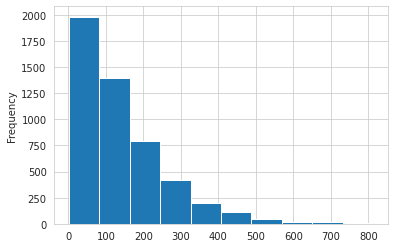

In [0]:
import seaborn as sns
sns.set_style("whitegrid")
imdb["num_critic_for_reviews"].plot(kind='hist')

Verificamos que poucos filmes tem mais de 500 votos, por isso um paralelo que podemos fazer é que filmes com muitos votos são mais populares e filmes com poucos votos não são tão populares. Logo, pelo histograma fica evidente que poucos filmes fazem muito muito sucesso. Claro que não conseguimos afirmar isso com propriedade, pois, novamente, estamos lidando com um número restrito de dados, mas são pontos interessantes de se pensar.

Outra informação interessante de se analisar, são os orçamentos e receitas de um filme, ou seja o aspecto financeiro. Vamos começar pelo gross:

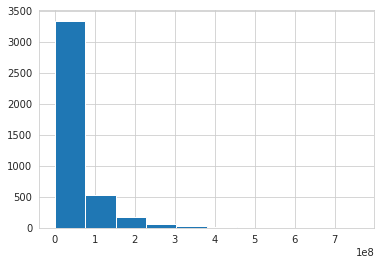

In [0]:
imdb["gross"].hist()

 Como você deve ter reparado, essa é a primeira vez que as escalas estão totalmente diferentes, pois no eixo **X** temos valores tão altos que a escala teve que ser de centena de milhões. Veja como pouquíssimos filmes tem **alto faturamento**, o que nos acende um primeiro alerta de que tem algo estranho (ou temos filmes que rendem muito dinheiro neste dataset).

 Vamos tentar conhecer quais são esses filmes com faturamento astronômico.


In [0]:
imdb.sort_values("gross", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000


Nessa lista temos **Avatar, Titanic, Jurassic World e The Avengers**, o que parece fazer sentido para nós, pois sabemos que esses foram filmes com bilheterias gigantescas. Analisando esses dados conseguimos verificar que os maiores faturamentos fazem sentido, mas encontramos um problema nos dados, dado que encontramos duas linhas diplicadas. Podemos usar o pandas para remover esses dados, mas por enquanto vamos manter todas as informações (Se estiver curioso em saber como se faz, consulte o [`.drop_duplicates()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)).

Maravilha, agora temos o faturamento e parece estar OK. Queremos começar a responder algumas perguntas e uma delas é: será que filmes coloridos tem faturamento maior que filmes preto e branco?

Para começar a responder essa pergunta precisamos transformar a coluna Color:

In [0]:
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
color_or_bw["color_0_ou_1"] = (color_or_bw["color"]=="Color") * 1
color_or_bw["color_0_ou_1"].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    4815
0     209
Name: color_0_ou_1, dtype: int64

In [0]:
color_or_bw.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


Veja que agora nós temos uma última coluna em nosso dataframe com valores 0 e 1. Agora podemos construir gráficos com essa informação de filmes coloridos ou não.

P.S: Em aula tivemos problemas porque Black and White tinha um espaço no início, vou cortar esses detalhes aqui no notebook, mas reforço a importância de acompanhar este processo no vídeo.

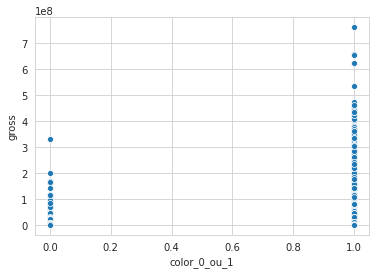

In [0]:
sns.scatterplot(data=color_or_bw, x="color_0_ou_1", y="gross")

Então plotamos nossos dados com um displot! Existem várias formas de visualizar essa informação, mas por ora essa nos ajuda a comparar os resultados. Repare como filmes coloridos tem valores bem maiores (isso já era até esperado), mas também temos pontos bem altos em filmes preto e branco, chamando muito atenção.

Vamos explorar algumas estatísticas destes filmes:

In [0]:
color_or_bw.groupby("color").mean()["gross"]

color
 Black and White    3.245702e+07
Color               4.902619e+07
Name: gross, dtype: float64

In [0]:
color_or_bw.groupby("color").mean()["imdb_score"]

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

In [0]:
color_or_bw.groupby("color").median()["imdb_score"]

color
 Black and White    7.4
Color               6.5
Name: imdb_score, dtype: float64

Das estatísticas temos duas bem interessantes, a média e mediana das notas de filmes preto e branco são maiores. Há várias possíveis explicações sobre o porquê disso, reflita aí sobre algumas delas e compartilhe conosco!


A partir de agora, vamos fazer uma investigação melhor em relação às finanças dos filmes (faturamento e orçamento). Vamos iniciar plotando e interpretando um gráfico de **gross** por **budget**:

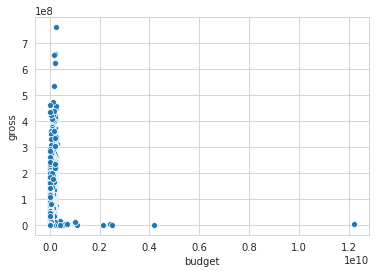

In [0]:
budget_gross=  imdb[["budget", "gross"]].dropna().query("budget >0 | gross > 0")

sns.scatterplot(x="budget", y="gross", data = budget_gross)

Para plotar os dados, primeiro removemos as linhas com informações de faturamento e orçamento vazias e também com valores igual a 0, para então gerar o gráfico.

Agora vamos analisar esse gráfico juntos, veja que a escala de **budget** mudou, agora é **e10**. Repare que apenas poucos filmes tem orçamentos tão grandes assim, e seus faturamentos são muito baixos. Será que temos algum problema nos dados? Vamos investigar melhor!

In [0]:
imdb.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973


Ordenando os dados pelo **budget** percebemos que as primeiras posições são de filmes asiáticos. O Guilherme trouxe um ponto interessante para a investigação, pois países como a Coreia usam moedas que tem três casas decimais a mais que o dólar. Então provavelmente o que está ocorrendo é que os dados de orçamento tem valores na moeda local, por isso detectamos valores tão discrepantes. 

Como não temos garantia dos números, vamos precisar trabalhar apenas com filmes americanos, assim garantimos que tanto gross e budget estão em dólares. Então vamos iniciar esse processo:

#Não esqueça de compartilhar a solução dos seus desafios com nossos instrutores, seja no Twitter, seja no LinkedIn. Boa sorte!

In [0]:
imdb["country"].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

Veja que temos filmes de diversos locais de origem:

In [0]:
imdb = imdb.drop_duplicates()
imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


Agora temos os dados para fazer uma análise melhor entre gross e budget. Vamos plotar o gráfico novamente:



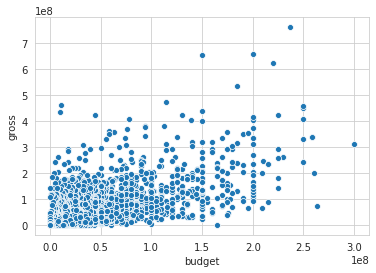

In [0]:
budget_gross = imdb_usa[["budget", "gross"]].dropna().query("budget >0 | gross > 0")

sns.scatterplot(x="budget", y="gross", data = budget_gross)

Veja que interessante, aparentemente temos uma relação entre orçamento e faturamento. Quanto maior o orçamento, maior o faturamento.

Já que estamos trabalhando com orçamento e faturamento, podemos construir uma nova informação, o lucro, para analisar. De forma bem simplista esse processo de construir novas informações a partir das existentes no dataset é conhecido como [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


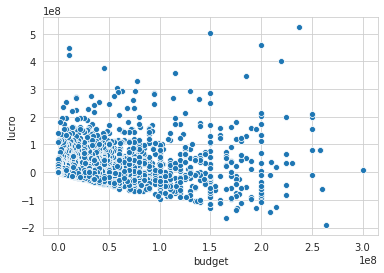

In [0]:
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']

budget_gross = imdb_usa.query("budget >0 | gross > 0")[["budget", "lucro"]].dropna()

sns.scatterplot(x="budget", y="lucro", data = budget_gross)

MUito bom! Nós construímos nossa coluna lucro na base de dados e plotamos o orçamento contra lucro.

Repare que temos pontos interessantes nesta visualização, um deles são esses filmes com muito custo e prejuizo. Isso pode ser um prejuizo real, mas também podem ser filmes que ainda não tiveram tempo de recuperar o investimento (lançamentos recentes). Outros pontos interessantes de se anlisar seriam os filmes com baixos orçamentos e muito lucro, será que são estão corretos ou pode ser algum erro da base? Parece que nem sempre gastar uma tonelada de dinheiro vai gerar lucros absurdos, será que é isso é verdade? 

Esse gráfico é muito rico em informações, vale a pena você gastar um tempo criando hipóteses.

Já que essa nova feature (lucro) parace ser interessante de se analisar, vamos continuar! Mas agora quero ver o lucro em relação ao ano de produção:

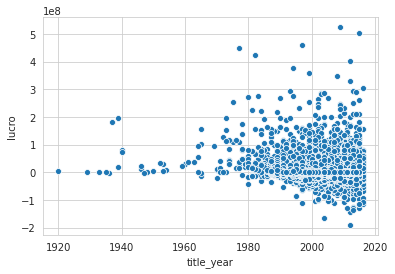

In [0]:
budget_gross = imdb_usa.query("budget >0 | gross > 0")[["title_year", "lucro"]].dropna()

sns.scatterplot(x="title_year", y="lucro", data = budget_gross)

Olha que legal esse gráfico, veja como alguns pontos mais recentes reforça a teoria de que alguns filmes podem ainda não ter recuperado o dinheiro investido (Claro que temos muitas variáveis para se analisar, mas é um indício relevante).

Outro ponto que chama muito atenção, são os filmes da década de 30 e 40 com lucros tão altos. Quais serão esses filmes? Bom, essa pergunta você vai responder no desafio do Paulo, que está louco para descobrir!

Falando em Paulo, ele sugeriu uma análise com os nome dos diretores e o orçamento de seus filmes, vamos ver se conseguimos concluir alguma coisa:

In [0]:
filmes_por_diretor = imdb_usa["director_name"].value_counts()
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,dindin,filmes_irmaos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


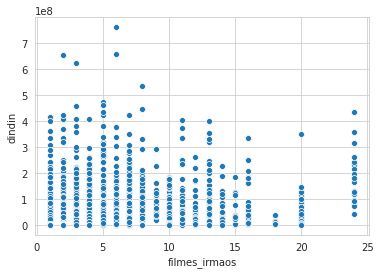

In [0]:
sns.scatterplot(x="filmes_irmaos", y="dindin", data = gross_director)

Essa imagem aparentemente não é muito conclusiva, então não conseguimos inferir tantas informações.

Esse processo de gerar dados, visualizações e acabar não sendo conclusivo é muito comum na vida de um cientista de dados, pode ir se acostumando =P.

Para finalizar, que tal realizar uma análise das correlações dos dados? EXistem várias formas de calcular a correlação, esse é um assunto denso.Você pode ler mais sobre essas métricas neste [link](https://pt.wikipedia.org/wiki/Correla%C3%A7%C3%A3o).

Vamos então inciar a análise das correlações plotando o pairplot.

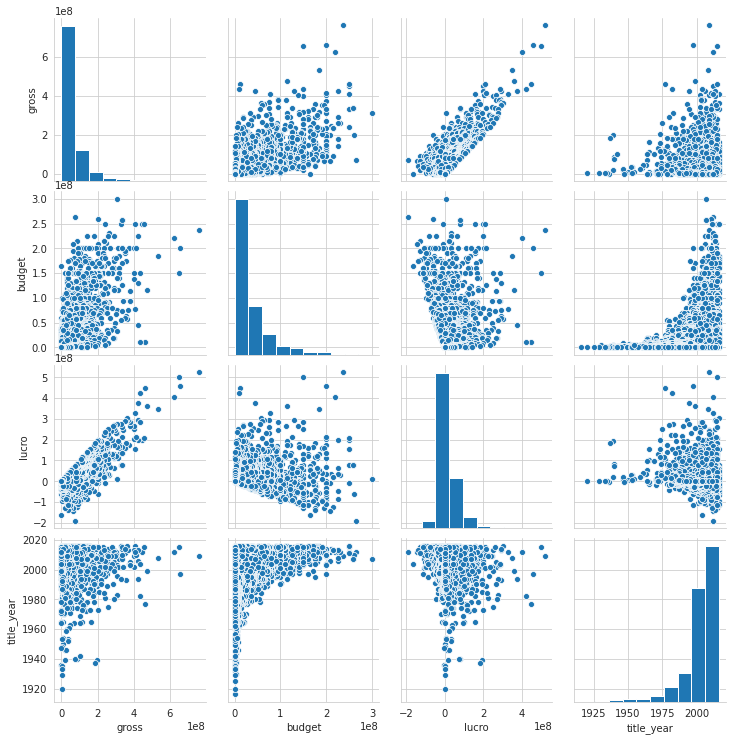

In [0]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])

O pairplot mostra muita informação e a melhor forma de você entender é assistindo as conclusões que tiramos sobre esses gráficos na vídeoaula.

Embora plotamos um monte de informação, não necessariamente reduzimos a correlação em um número para simplificar a análise. Vamos fazer isso com a ajuda do `.corr()` do [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). 

In [0]:
imdb_usa[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.645673,0.797037,0.034827
budget,0.645673,1.000000,0.053455,0.229453
lucro,0.797037,0.053455,1.000000,-0.123035
title_year,0.034827,0.229453,-0.123035,1.000000


Com o pandas é simples de se calcular a correlação, mas precisamos saber interpretar os resultados. Vamos fazer isso?

A correlação é uma métrica que vai de 1 a -1. Quando a correlação é 1, dizemos que é totalmente correlacionada (relação linear perfeita e positiva), ou seja se uma variável aumenta em 10 a outra também irá aumentar em 10. Quando o valor da correlação é -1, também temos variáveis totalmente correlacionda, só que de maneira negativa (relação linear perfeita negativa), neste caso, se uma variável aumenta em 10 a outra reduz em 10. Agora quando a correlação é 0 temos a inexistência de correlação, ou seja, uma variável não tem influêcia sobre a outra. 

Agora sim, entendido sobre a correlação vamos analisar as nossas. Veja que lucro e gross tem uma correlação alta, o que indica que quanto maior o orçamento maior o lucro (mas repare que a correlação não é perfeita), já o title_yers e lucro tem correlação negativa, mas muito perto de zero (ou seja quase não tem correlação). Viu como conseguimos analisar muitas coisas com a correlação?! Pense e tente analisar os outros casos também.


Com isso chegamos ao final de mais uma aula da #quarentenadados. E aí, o que está achando, cada vez mais legal e ao mesmo tempo mais complexo né?

O que importa é estar iniciando e entendendo o que fazemos para analisar os dados! **Continue até o fim, garanto que vai valer a pena.**
Vamos praticar?

**Crie seu próprio notebook, reproduza nossa aula e resolva os desafios que deixamos para vocês**.


Até a próxima aula!

**P.S: A partir de agora teremos muitos desafios envolvendo mais análises e conclusões, então não haverá um "gabarito". O importante é você compartilhar suas soluções com os colegas e debater os seus resultados e das outras pessoas**

## Desafio 1 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

Primeiro, vou verificar se todos os registros estão com essa informação.

In [0]:
imdb.shape

(4998, 28)

In [0]:
imdb['color'].isna().sum()

19

In [0]:
imdb.groupby('color')['color'].count()

color
 Black and White     207
Color               4772
Name: color, dtype: int64

19 registros sem a informação de 'color'. Para essa análise, vou optar por retirar esses caras.

In [0]:
d1_imdb_color = imdb.dropna(subset=['color'])
d1_imdb_color.shape

(4979, 28)

Agora, posso plotar como solicitado.

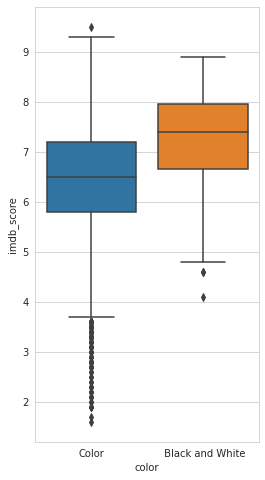

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,8)) 
sns.boxplot(data=d1_imdb_color, x='color', y='imdb_score')
plt.show()

In [0]:
d1_imdb_color.groupby('color')['imdb_score'].describe()

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
Black and White,207.0,7.220290,0.908949,4.1,6.65,7.4,7.95,8.9
Color,4772.0,6.408738,1.118652,1.6,5.80,6.5,7.20,9.5


##Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

No gráfico de **budget por lucro** temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

Estamos falando deste gráfico:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


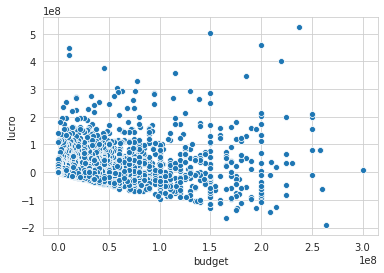

In [0]:
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']

budget_gross = imdb_usa.query("budget >0 | gross > 0")[["budget", "lucro"]].dropna()

sns.scatterplot(x="budget", y="lucro", data = budget_gross)

Vou buscar o filme com budget maior que 2.5 e lucro menor que -1. Acredito ser o suficiente.

In [0]:
d2_filme = imdb_usa.query('budget > 250000000 & (gross - budget) < -100000000')
d2_filme

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0


E aí está o filme: **John Carter**, com orçamento de **263.700.000,00** e faturamento de **73.058.679,00**, obtendo um prejuízo de **190.641.321,00**. Apenas por curiosidade, já que estamos falando disso, a nota IMDB desse filme é **6,6**. 

##Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)


Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

Vou plotar gráficas por ano trazendo o orçamento e faturamento para fazer a análise.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


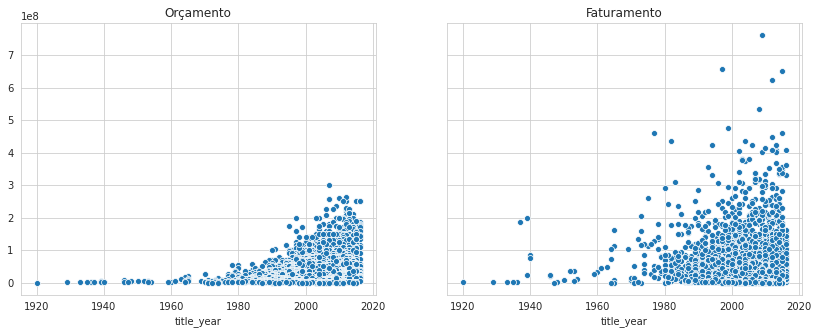

In [0]:
#plotar dois gráficos na mesma imagem:
f, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
axes[0].set_title('Orçamento')
axes[1].set_title('Faturamento')
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']
budget_gross = imdb_usa.query("budget > 0 | gross > 0")[["budget", "lucro", 'title_year', 'gross']].dropna()
sns.scatterplot(x="title_year", y="budget", data = budget_gross, ax=axes[0]).set_ylabel('')
sns.scatterplot(x="title_year", y="gross", data = budget_gross, ax=axes[1])
plt.show()

Agora vou trazer o gráfico de lucro x ano.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


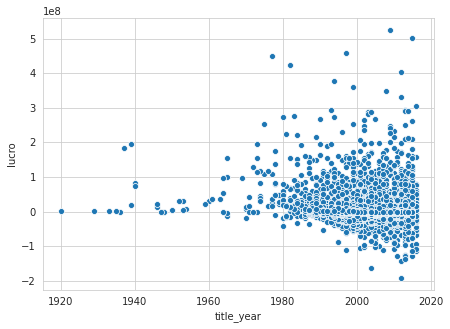

In [0]:
plt.figure(figsize=(7,5))
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']
budget_gross = imdb_usa.query("budget > 0 | gross > 0")[["budget", "lucro", 'title_year', 'gross']].dropna()
sns.scatterplot(x="title_year", y="lucro", data = budget_gross)
plt.show()

É possível notar que sim, conforme vai passando os anos para os mais atuais, o prejuízo vai aparecendo e aumentando, inclusive.

Eu comecei pensando que isso poderia se dar devido ao orçamento ser maior nos filmes mais atuais, precisando assim de um faturamento maior também para que não houvesse prejuízo. Mas trazendo o primeiro conjunto de gráfico, eu notei que o faturamento também sobe de acordo com o orçamento, e até mais.

O que acredito que pode ocorrer é que, como a distribuição do faturamento é mais dispersada, pode haver filmes que tiveram um bom resultado mas há ainda os filmes que não foram tão bem, e o orçamento é mais similares.

Penso que isso se deve sim ao fato dos orçamentos estarem maiores. E também pode ser sim que ainda não houve o tempo para o filme começar a dar lucro. Além de que, com a quantidade muito maior de filmes que temos atualmente, o consumo, e o dinheiro, acaba se divindo entre eles. Eu acho que dificilmente um filme lançado na década passada consegue subir o faturamento (via cinema, esquece, não sei se conta outros fatores nesse caso). Então os três fatores que eu colocaria são: orçamentos maiores, variedade de filmes maiores, dispersando o consumo, e o pico do retorno ainda não atingido para os muito atuais.

## Desafio 4 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

O gráfico em questão é o:

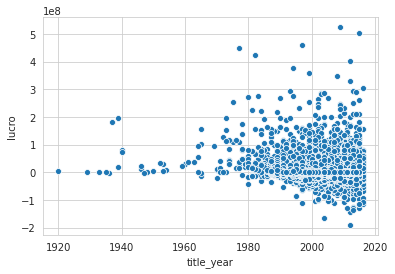

In [0]:
budget_gross = imdb_usa.query("budget >0 | gross > 0")[["title_year", "lucro"]].dropna()

sns.scatterplot(x="title_year", y="lucro", data = budget_gross)

Estamos falando dos dois pontos próximos à 1940 e lucro perto dos 200.000.000.

Aqui vou usar o mesmo esquema do desafio 2, trazer via query filmes até 1940 com lucro maior que 100.000.000,00.

In [0]:
d4_filme = imdb_usa.query('title_year < 1940 & (gross - budget) > 100000000')
d4_filme

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
3970,Color,Victor Fleming,157.0,226.0,149.0,248.0,George Reeves,503.0,198655278.0,Drama|History|Romance|War,Hattie McDaniel,Gone with the Wind,215340,1862,Thomas Mitchell,1.0,battle of the sexes|gallantry|honesty|indiffer...,http://www.imdb.com/title/tt0031381/?ref_=fn_t...,706.0,English,USA,G,3977000.0,1939.0,384.0,8.2,1.37,16000,194678278.0
4449,Color,William Cottrell,145.0,83.0,0.0,31.0,Billy Gilbert,82.0,184925485.0,Animation|Family|Fantasy|Musical,Adriana Caselotti,Snow White and the Seven Dwarfs,133348,229,Lucille La Verne,1.0,dwarf|love|princess|queen|snow white,http://www.imdb.com/title/tt0029583/?ref_=fn_t...,204.0,English,USA,Approved,2000000.0,1937.0,47.0,7.7,1.37,0,182925485.0


Assim, temos os filmes **"Gone with the Wind"** e **"Snow White and the Seven Dwarfs"**, lançados em **1939** e **1937** e com lucro de **194.678.278,00** e **182.925.485,00**, respectivamente.

## Desafio 5 do [Paulo Silveira](https://twitter.com/paulo_caelum)

No gráfico de **filmes_irmaos por dindin** temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

O gráfico em questão é esse aqui:

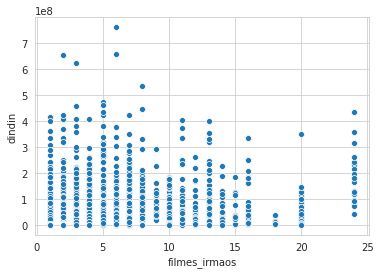

In [0]:
sns.scatterplot(x="filmes_irmaos", y="dindin", data = gross_director)

O que eu posso fazer é buscar os filmes_irmaos entre 15 e 20 e com dindin máximo não ultrapassando 1.

In [0]:
d4_filme = gross_director.query('filmes_irmaos > 15 & filmes_irmaos < 20')
d4_filme.groupby('director_name')['dindin'].max()

director_name
Spike Lee       88504640.0
Tim Burton     334185206.0
Woody Allen     39200000.0
Name: dindin, dtype: float64

Eu havia ficado em dúvida com o Spike Lee, que aparece aí em cima com dindin máximo de **88.504.640,00**, E NÃO LOCALIZEI ALGO PARECIDO NO GRÁFICO. Acontece que Spike Lee e Tim Burton **tem os mesmos 16 filmes_irmaos**, sendo assim eles aparecem "juntos" na mesma vertical.

In [0]:
d4_filme.groupby('director_name')['filmes_irmaos'].unique()

director_name
Spike Lee      [16.0]
Tim Burton     [16.0]
Woody Allen    [18.0]
Name: filmes_irmaos, dtype: object

Apesar disso, está correto o palpite de que o os pontos correspondem ao Woody Allen, pois o valor máximo de dindin dele (**39.200.000,00**) não ultrapassa os **100.000.000,00** que é a primeira linha horizontal do gráfico. 

In [0]:
gross_director.query('director_name == "Woody Allen"').sort_values('dindin', ascending=False)

,director_name,dindin,filmes_irmaos
2932,Woody Allen,39200000.0,18.0
1960,Woody Allen,33404871.0,18.0
1975,Woody Allen,17071230.0,18.0
1737,Woody Allen,16684352.0,18.0
2070,Woody Allen,14792779.0,18.0
1861,Woody Allen,13383737.0,18.0
2166,Woody Allen,10763469.0,18.0
1869,Woody Allen,10569071.0,18.0
1872,Woody Allen,9714482.0,18.0
1538,Woody Allen,7496522.0,18.0


## Desafio 6 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

O gráfico em questão é o:

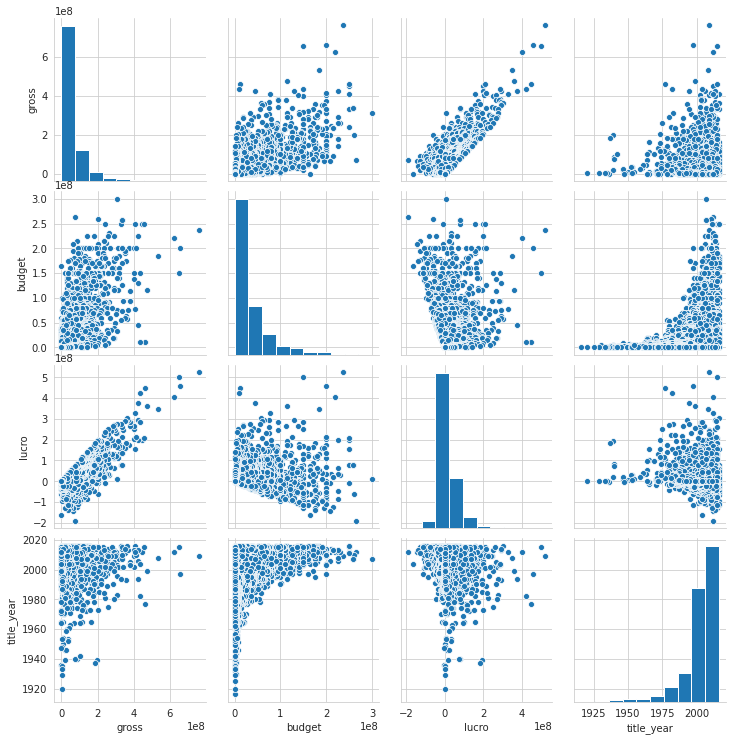

In [0]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])

As análises que eu fiz sobre os gráficos apresentados no pairplot:

*   Gross x Gross

> Consigo notar que uma grande parte, a grande maioria mesmo, dos filmes obtiveram faturamento referente à primeira barra do gráfico. Após isso cai muito a frequência dos filmes nas próximas faixas de faturamento. O que faz sentido mesmo.

*   Gross x Budget

> Notei que a distribuição de orçamento nas duas primeiras faixas apresentam quase o mesmo faturamento, parando na primeira faixa. Mais que a primeira faixa as ocorrências são bem dispersas. Não segue uma tendência de que "quanto maior o orçamento, maior o faturamento".

*   Gross x Lucro

> Aqui é possível ver uma linha que acho que faz sentido, pois quanto maior o faturamento, maior o lucro. Acho que é uma tendência sim justificável, mas claro que existem exceções.

*   Gross x Title Year

> É possível ver que o faturamento é maior em tempos atuais. Eu acredito que isso pode ocorrer devido: a) a valorização da moeda; b) as mega-produções e blockbusters que contam com muito marketing, muito consumo e consequentemente muito faturamento; c) o acesso mais fácil ao cinema pela população com o passar do tempo.

*   Budget x Gross

> A análise é a mesma do Gross x Budget, há muito mais filmes na primeira faixa do Gross independente do Budget e vai ficando mais disperso nas próximas faixas do faturamento. Orçamento alto não significa exatamente faturamento na mesma proporção.

*   Budget x Budget

> A análise é parecida com a do Gross x Gross. Há uma grande quantidade de filmes com orçamento na primeira barra, e cai muito nas próximas.

*   Budget x Lucro

> Aqui achei interessante analisar o prejuízo, que aumenta conforme aumenta o orçamento apenas dos filmes que deram prejuízo. Faz sentido pois fica mais difícil obter lucro com um gasto tão grande. Olhando para os filmes que deram lucro, acredito que é um pouco parecido com o faturamento, quanto maior o orçamento não significa que terá mais lucro.

*   Budget x Title Year

> O lucro ascende conforme a atualidade assim como o faturamento, mas a curva é mais visível. Acredito que possa seguir a linha do que foi analisado no gráfico de Gross x Title Year, nos três pontos que coloquei.

*   Lucro x Gross

> É a mesma análise que fiz em Gross x Lucro

*   Lucro x Budget

> Mesma análise que fiz em Budget x Lucro

*   Lucro x Lucro

> Em comparação às demais barras, poucos foram os filmes que deram prejuízo e muito lucro. A maioria ficou na primeira barra positiva.

*   Lucro x Title Year

> Os prejuízos começam a aparecer conforme o tempo vai chegando na atualidade, assim como os maiores lucros. Acredito que em linha com os altos orçamentos dos filmes atuais, devido à valorização da moeda e tudo mais que já foi falado. Sobre o prejuízo, acho que pode vir nos anos mais atuais também, além do alto orçamento, por conta da grande oferta de filmes que são apresentados, espalhando o consumidor e não focando o faturamento em um único filme.

*   Title Year x Gross

> Mesma análise feita em Gross x Title Year.

*   Title Year x Budget

> Mesma análise feita em Budget x Title Year.

*   Title Year x Lucro

> Mesma análise feita em Lucro x Title Year.

*   Title Year x Title Year

> Aqui eu notei que realmente há muito mais filmes conforme os anos são mais atuais, o que pode ser um indicativo da minha análise sobre a maior presença de prejuízo, onde há mais oferta de filmes e o consumidor acaba dividindo o consumo entre essa demanda, não focalizando em apenas um único filme.

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)


Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.


Primeiro vou preparar um DataFrame com os filmes pós 2000.

In [0]:
d7_filmes = imdb_usa.query('title_year > = 2000')
d7_filmes

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,Color,Anthony Vallone,NaN,84.0,2.0,2.0,John Considine,45.0,NaN,Crime|Drama,Richard Jewell,The Mongol King,36,93,Sara Stepnicka,0.0,jewell|mongol|nostradamus|stepnicka|vallone,http://www.imdb.com/title/tt0430371/?ref_=fn_t...,1.0,English,USA,PG-13,3250.0,2005.0,44.0,7.8,NaN,4,NaN
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,690,Daniella Pineda,1.0,written and directed by cast member,http://www.imdb.com/title/tt1880418/?ref_=fn_t...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413,-4416.0
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16,NaN
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660,NaN


Agora a correlação:

In [0]:
d7_filmes[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.709233,0.770642,0.105342
budget,0.709233,1.000000,0.097307,0.058550
lucro,0.770642,0.097307,1.000000,0.035039
title_year,0.105342,0.058550,0.035039,1.000000


O que consigo notar é que faturamento e orçamento tem uma boa correlação, ou seja, quando o faturamento cresce o orçamento cresce também, mas essa correlação é ainda mais forte na correlação faturamento x lucro, o que acaba fazendo mais sentido pois para um filme gerar lucro é preciso de um bom faturamento. 

O orçamento não tem boa correlação com o lucro. Significa que não é porque o orçamento cresce que necessariamente o lucro vai crescer, uma variável não implica na outra.

Já as correlações de ano apresentam o seguinte: 1) o ano não correlaciona muito com o faturamento e com o lucro, mas melhora um pouco (ainda não é tão bom) com o orçamento. Ou seja, em filmes atuais, pode-se dizer que o orçamento é maior (não é regra).

## Desafio 8 do [Allan Spadini](https://twitter.com/allanspadini)

Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

Vou escolher o gráfico de faturamento x lucro que é onde eu consegui "ver" uma reta mais definida.

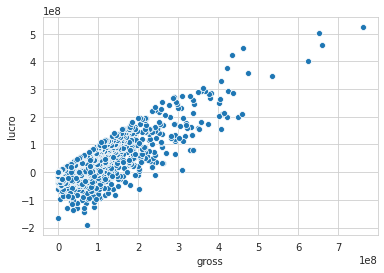

In [0]:
d8_imdb_usa = imdb_usa.query("budget > 0 | gross > 0")[["title_year", "lucro", "gross"]].dropna()
sns.scatterplot(x="gross", y="lucro", data = d8_imdb_usa)

Agora, o gráfico com a linha de regressão:

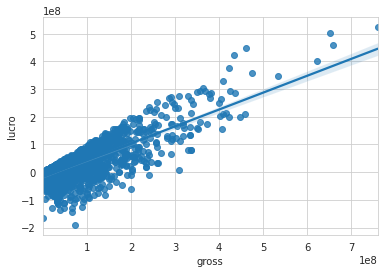

In [0]:
sns.regplot(x="gross", y="lucro", data=d8_imdb_usa)

## Desafio 9 da [Thais André](https://twitter.com/thais_tandre)

Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.


Vou criar a coluna de número de avaliações por ano.

In [0]:
filmes_por_diretor = imdb_usa["director_name"].value_counts()
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, 
                                                                                      on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,dindin,filmes_irmaos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


In [0]:
num_avaliacoes_ano = imdb_usa.groupby('title_year')['num_voted_users'].sum()

Agora adicionar essa coluna no DataFrame:

In [0]:
d9_imdb_usa = imdb_usa.rename(columns={'num_voted_users':'num_votos'})
d9_imdb_usa = d9_imdb_usa[['gross', 'budget', 'lucro', 'imdb_score', 'num_votos', 
                        'title_year']].set_index('title_year').join(num_avaliacoes_ano, on='title_year')
d9_imdb_usa = d9_imdb_usa.rename(columns={'num_voted_users':'num_votos_ano'})
d9_imdb_usa = d9_imdb_usa.reset_index()
d9_imdb_usa.head()

,title_year,gross,budget,lucro,imdb_score,num_votos,num_votos_ano
0,2009.0,760505847.0,237000000.0,523505847.0,7.9,886204,16554036.0
1,2007.0,309404152.0,300000000.0,9404152.0,7.1,471220,15884736.0
2,2012.0,448130642.0,250000000.0,198130642.0,8.5,1144337,19862275.0
3,2012.0,73058679.0,263700000.0,-190641321.0,6.6,212204,19862275.0
4,2007.0,336530303.0,258000000.0,78530303.0,6.2,383056,15884736.0


E agora, a correlação:

In [0]:
d9_imdb_usa[['gross', 'budget', 'lucro', 'imdb_score', 'num_votos', 'num_votos_ano', 'title_year']].corr()

,gross,budget,lucro,imdb_score,num_votos,num_votos_ano,title_year
gross,1.000000,0.645673,0.797037,0.258948,0.640387,0.004299,0.034827
budget,0.645673,1.000000,0.053455,0.078936,0.430993,0.194059,0.229453
lucro,0.797037,0.053455,1.000000,0.294858,0.508717,-0.114601,-0.123035
imdb_score,0.258948,0.078936,0.294858,1.000000,0.447340,-0.165823,-0.227569
num_votos,0.640387,0.430993,0.508717,0.447340,1.000000,0.063306,0.025617
num_votos_ano,0.004299,0.194059,-0.114601,-0.165823,0.063306,1.000000,0.762953
title_year,0.034827,0.229453,-0.123035,-0.227569,0.025617,0.762953,1.000000


A correlação entre Gross e Budget já havia sido analisada anteriormente em aula, que tem alguma relação mas não é tão forte, o que indica que filmes com altos faturamentos não necessariamente tiveram altos orçamentos. A correlação entre Gross e Lucro já é mais forte, indicando que quando o faturamento cresce, o lucro também cresce, o que faz todo sentido. Faturamento e nota no IMDB não apresentam quase nenhuma correlação, indicando que faturamento não implica em nota. Já para o número de votos o faturamento tem alguma correlação. Pode-se analisar talvez que quando o faturamento aumenta, o filme é mais visto, aumentando também o número de votos. Faturamento e ano de lançamento não tem correlação (bem perto de zero).

Entre orçamento e lucro a correlação não é tão forte. Quando o orçamento cresce não necessariamente o lucro vai crescer também. A correlação já é um pouco maior entre orçamento e nota IMDB, que pode indicar que quanto maior orçamento a nota tende a ser alta (mas não é regra). Orçamento e número de votos apresentam fraca correlação. Mais fracas ainda são as correlações do orçamento com o número de votos no ano e o ano de lançamento.

A correlação do lucro com a nota IMDB é fraca, não há tendência de que se o lucro cresce a nota também. A correlação do lucro aumenta um pouco com o número de votos, mas também não é tão forte.

A nota IMDB não apresenta boa correlação com as outras variáveis. A correlação mais alta, o que não é alta, é com o número de votos. Isso acontece também com as correlações da variável de número de votos.

O número de votos no ano apresenta uma correlação interessante com o ano de lançamento. O que talvez pode ser analisado: a) quanto mais atual o filme, maior a quantidade de notas que ele recebe ou; b) há mais filmes atuais, por isso a quantidade de votos nos anos atuais é maior.

#Não esqueça de compartilhar a solução dos seus desafios com nossos instrutores, seja no Twitter, seja LinkedIn. Boa sorte!